In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Load Data
from mnist import MNIST
import numpy as np
mndata = MNIST('data')

train_X, train_Y = mndata.load_training()
test_X, test_Y = mndata.load_testing()

train_X, train_Y = np.array(train_X), np.array(train_Y)
test_X, test_Y = np.array(test_X), np.array(test_Y)


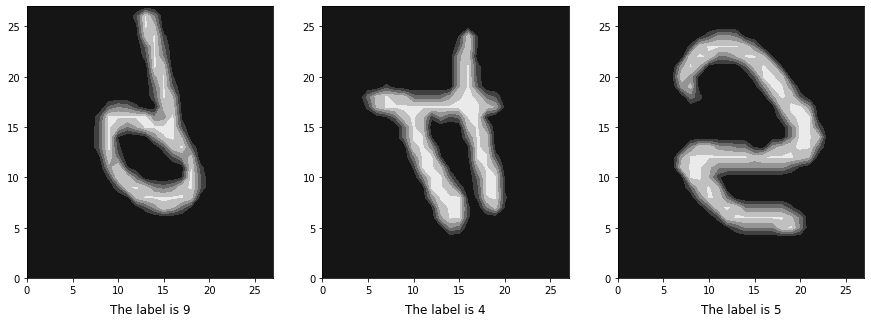

In [3]:
from matplotlib import pyplot
import random
fig, axs = pyplot.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(3):
    x = random.randrange(0, np.size(train_Y))
    axs[i].contourf(train_X[x].reshape((28, 28)),5, cmap=pyplot.get_cmap('gray'))
    axs[i].set_title(f"The label is {train_Y[x]}", y=-0.15)


In [4]:
import Optimizers
from NeuralNetwork import NeuralNetwork
from Layer import Layer
from ActivationFunction import ActivationFunction
from CostFunction import CostFunction

neuralNetwork = NeuralNetwork(
    layers=[
        Layer(neurons=28*28, activation=ActivationFunction.identity),
        Layer(neurons=100, activation=ActivationFunction.leaky_reLU),
        Layer(neurons=50, activation=ActivationFunction.leaky_reLU),
        Layer(neurons=10, activation=ActivationFunction.softmax),
    ],
    optimizer=Optimizers.GradientDescent(learning_rate=0.05),
    # l2_regularization=0.0001
)
neuralNetwork.init_random_weights()
np.size(train_Y)


60000

In [5]:
print(neuralNetwork.optimizer.learning_rate)
epoch = 10
batch_size = 32
while(epoch):
    shuffler = np.random.permutation(len(train_Y))
    train_X = train_X[shuffler]
    train_Y = train_Y[shuffler]

    # np.random.shuffle(train_X)
    correct = 0

    for i in range(np.size(train_Y) // batch_size):
        j = i * batch_size

        for k, data in enumerate(train_X[j:j+batch_size]):

            index = j + k
            expected = np.zeros(10)
            expected[train_Y[index]] = 1
            training_data = train_X[index] / 255
            out, cost = neuralNetwork.learn(training_data, expected)

            if(np.argmax(out) == train_Y[index]):
                correct = correct + 1
            # print(len(train_X[j:j+batch_size]))

        neuralNetwork.update_from_learning()


    print(f"Epoch: {10 - epoch}, Training error rate: {1 - correct / np.size(train_Y)}")

    epoch = epoch - 1


0.05
Epoch: 0, Training error rate: 0.27218333333333333
Epoch: 1, Training error rate: 0.09988333333333332
Epoch: 2, Training error rate: 0.07721666666666671
Epoch: 3, Training error rate: 0.06428333333333336
Epoch: 4, Training error rate: 0.05696666666666672
Epoch: 5, Training error rate: 0.05143333333333333
Epoch: 6, Training error rate: 0.04623333333333335
Epoch: 7, Training error rate: 0.042850000000000055
Epoch: 8, Training error rate: 0.039316666666666666
Epoch: 9, Training error rate: 0.0373


In [6]:
neuralNetwork.save_to_file("epoch_10_layer_100_50_leakyReLU")